In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading Bank Dataset
bank = pd.read_csv('/Users/Bunny/Documents/Prasanthi/Springboard/Projects/Capstone 1 /Bank Marketing dataset/bank-additional/bank-additional-full.csv', delimiter=';')

In [3]:
#Data at a glance
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Variables present in the dataset
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
#Dataset dimensions
bank.shape

(41188, 21)

In [6]:
#Renaming Dependent Variable 'y' as 'outcome' and 'campaign' as 'number_calls'
bank = bank.rename(columns= {'y':'outcome','campaign' : 'number_calls'})
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'number_calls', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'outcome'],
      dtype='object')

## Data Wrangling

### Missing value treatment

In [7]:
# % missing values for each attribute
bank.isnull().sum()/41188*100 

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
number_calls      0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
outcome           0.0
dtype: float64

In [8]:
#Replacing unknown values with np.NaN
bank = bank.replace('unknown', np.NaN)

In [9]:
#Removing rows containing null values
bank = bank.dropna(axis = 0)

### Transforming variables

In [10]:
#Converting dependent variable'outcome' from categorical to numerical. yes = 1 , no = 0
bank['outcome'] = (bank['outcome']=='yes').astype(int)

## Exploratory Data Analysis

#### Summary stats

In [11]:
#Summary statistics of Continuous varibles
bank.describe()

,age,duration,number_calls,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409,0.126574
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065,0.332501
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Average age of customers contacted for this campaign is 39 years and each customer was contacted approx. 3 times before hearing a decision from them.

#### Distribution of Dependent variable categories

outcome
0    87.342561
1    12.657439
dtype: float64


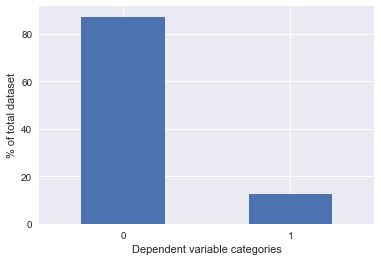

In [12]:
#Distribution of 'outcome' variable
bank_outcome_dist = bank.groupby('outcome').size()/30488*100
print(bank_outcome_dist)
bank_outcome_dist.plot(kind = 'bar',rot=360)
plt.xlabel('Dependent variable categories')
plt.ylabel('% of total dataset')

The bank marketing dataset in study is highly imbalanced. Unfavourable outcomes make upto about 87% of the total observations while the favourable ones make up the remaining 13% making the data vulnerable to prediction biases while trying to fit machine-learning models. We will be dealing with this issue only after performing EDA in order to understand the dynamics of unmanipulated data better.

#### Independent Variable - 'Default'

In [13]:
#Investigating 'default' variable 
bank.groupby(['outcome', 'default']).size().unstack('default')

default,no,yes
outcome,,
0,26626.0,3.0
1,3859.0,NaN


* According to this, only 3 customers with credit defaults have been contacted and the remaining contacted were those with either no credit amounts or with cleared monthly payments. This attribute will therefore be of no use for predicting the outcome and hence will be removed.

In [14]:
#remove 'default' variable from the dataset
bank = bank.drop('default',axis=1)

* The variable ‘duration’ highly affects the output target; i.e. if a call has not been made at all or not been picked by the customer it results in a failed outcome. Yet, the duration is not known before a call is performed. Also, after the end of the call outcome is obviously known (success or a failure). Hence this variable has been removed from future predictive analysis. 

#### Independent Variable - 'Duration'

In [15]:
#Remove 'duration' variable from the dataset
bank = bank.drop('duration',axis=1)

#### Variable number_calls - Average calls made per customer based on 'outcome' categories

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112e9ac88>], dtype=object)

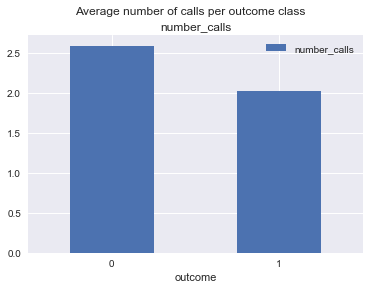

In [16]:
# Average number of calls per outcome class
bank[['number_calls','outcome']].groupby(['outcome']).mean().plot(kind='bar',subplots=True,rot=360,title= 'Average number of calls per outcome class') 

In [17]:
campaign_calls = (bank['number_calls'] <= 3).sum()*100/ 30488
print('% of customers contacted 3 or less than 3 times:',campaign_calls,('%'))
print('% of customers contacted more than 3 times:', (100-campaign_calls),('%'))

% of customers contacted 3 or less than 3 times: 82.0781946996 %
% of customers contacted more than 3 times: 17.9218053004 %


Customers on an average made their decision by 3rd call with a bank representative. Those who agreed to the offer made their decision within the 2nd call. Customers who rejected the offer expressed their lack of interest only at 3rd call or later. 

For the purpose of modelling, the overall average calls aspect of this attribute was used and individual outcome wise data has been ignored. 

#### Age variable

In [18]:
#Changing age variable into an integer in order to create categories
bank['age'].astype(int)
bank['age'].dtypes

dtype('int64')

In [19]:
#Converting Age variable to a categorical variable 'age_category'
bank['age_category']=np.where(bank['age'] < 25,'Young adult',bank['age'])
bank['age_category']=np.where((bank['age'] >= 25) & (bank['age'] < 35 ),'Adult',bank['age_category'])
bank['age_category']=np.where((bank['age'] >= 35) & (bank['age'] < 54 ),'Middle Aged',bank['age_category'])
bank['age_category']=np.where((bank['age'] >= 54) & (bank['age'] < 60 ),'Pre-retirement',bank['age_category'])
bank['age_category']=np.where((bank['age'] >= 60),'Post-retirement',bank['age_category'])

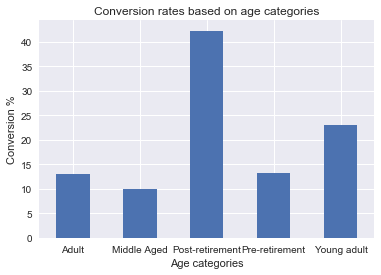

In [20]:
#Conversion rates based on Age categories 
age = bank.groupby('outcome').age_category.value_counts().unstack('outcome')
age['conversion_rates'] = (age[1]/(age[0]+age[1]))*100
age['conversion_rates'].plot(kind='bar',title='Conversion rates based on age categories',rot=360)
plt.ylabel('Conversion %')
plt.xlabel('Age categories')

Based on the above graph, Retired individuals and young adults seem to be interested in term-deposit offer. These could be highly potential groups while rolling out term-deposit campaigns in future. 

Since the remaining 3 groups have similar coversion rates, we can put bucket them into 1 category called 'Working adults' which describes them the best; Adults to pre-retirement.

In [21]:
bank['age_category']=np.where((bank['age'] >= 25) & (bank['age'] < 60 ),'Working adult',bank['age_category'])


Chi-square test has been performed to see if there is any statistically significant difference in campaign outcome among these groups.

In [22]:
from scipy.stats import chi2_contingency

In [23]:
#Chi-Square test to check existence of statistical difference among Age groups
outcome_age = bank.groupby(['outcome', 'age_category']).size().unstack('age_category')
outcome_age

age_category,Post-retirement,Working adult,Young adult
outcome,,,
0,509,25455,665
1,373,3287,199


In [24]:
#Returns chi2, p-value, Degrees of freedom, contingency_table
contingency_table = chi2_contingency(outcome_age)
contingency_table

(823.45148375934889,
 1.5480402347335499e-179,
 2,
 array([[   770.36138809,  25103.99888481,    754.63972711],
        [   111.63861191,   3638.00111519,    109.36027289]]))

Chi-tabular < Chi-calculated with a p-value <0.05 indicates that there is a significant difference in outcome based on different categories of age. 

#### Job 

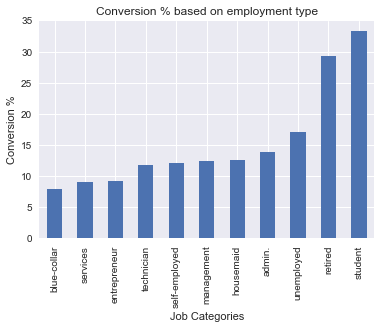

In [25]:
#Conversion rates based on Job Categories
job = bank.groupby('outcome').job.value_counts().unstack('outcome')
job['conversion_rate']= 100*job[1]/(job[0]+job[1])
job['conversion_rate'].sort_values().plot(kind= 'bar', title = 'Conversion % based on employment type',rot = 90)
plt.ylabel('Conversion %')
plt.xlabel('Job Categories')

Individuals who are retired, are students, unemployed or have administrative roles have higher conversion rates compared to those working in other roles.

Retired individuals do not draw regular incomes. Their main interest would be to invest all the savings that have been accumulated so far into low-risk safe return generating products such as term deposits. Also, the average age of retired individuals is 62 which supports the analysis derived from age variable. 

Students do not have a consistent source of income and are most likely to look for avenues that can grow their savings without having inherent risks until they reach their prime earning period. Blue-collar, housemaids and technicians have very low disposable incomes and tend to have minimum to no savings for them to be able to invest.

On the other hand, risk taking, whether financial or social is a distinguishing characteristic of entrepreneurs. High-risk avenues like stocks and other equity based instruments are more rewarding for them than term deposits.

It is interesting to see unemployed in the high conversion category. External data can be combined in future to arrive at a consensus.

In [26]:
print('The mean age of retired individuals is:', round(bank[bank.job == 'retired'].age.mean()),'yrs')

The mean age of retired individuals is: 63 yrs


In [27]:
print('The mean age of student category is:', round(bank[bank.job == 'student'].age.mean()),'yrs')

The mean age of student category is: 25 yrs


Mean age of the top two categories has been calculated to see if the results support what has been observed while analyzing the Age category and there indeed do. Young adults represent 25 yrs age group and retired individuals represent individuals aged 60 yrs and more.

#### Months of an year

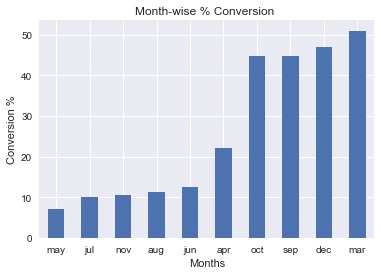

In [28]:
#Conversion rates based on different Months of an year
month_wise = bank.groupby('outcome').month.value_counts().unstack('outcome')
month_wise['conversion_rate']= 100*month_wise[1]/(month_wise[0]+month_wise[1])
month_wise['conversion_rate'].sort_values().plot(kind= 'bar', title = 'Month-wise % Conversion ',rot =360)
plt.ylabel('Conversion %')
plt.xlabel('Months')

The Portuguese tax year runs concurrently with the calendar year from 1 January to 31 December. Individuals hold liquid cash until year-end in anticipation of unexpected expenditures over the course of that year. 

While locking funds in low-return investments such as term deposits in initial months itself might not be a good decision, year-end could be a good time to invest in them in order maximize tax benefits.

Data ranges from May 2008 to Nov 2010, thus reducing the possibility of random occurrences to a good extent.



#### Marital Status

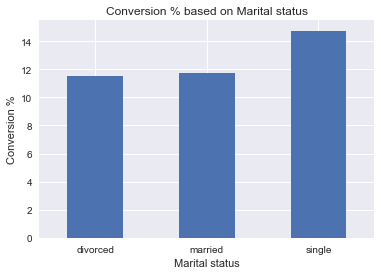

In [29]:
#Conversion rates based on marital status
marital_status = bank.groupby('outcome').marital.value_counts().unstack('outcome')
marital_status['conversion_rate']= 100*marital_status[1]/(marital_status[0]+marital_status[1])
marital_status['conversion_rate'].sort_values().plot(kind= 'bar', title = 'Conversion % based on Marital status',rot = 360)
plt.ylabel('Conversion %')
plt.xlabel('Marital status')

Not much difference can be observed in conversion rates based on martital status categories in this preliminary analysis. 

#### Contact

In [30]:
bank['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

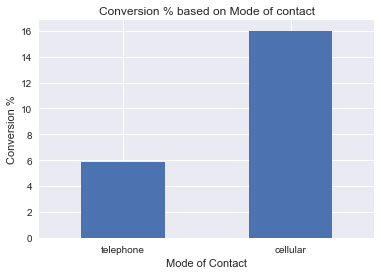

In [31]:
contact_conv = bank.groupby('outcome').contact.value_counts().unstack('outcome')
contact_conv['conversion_rate']= 100*contact_conv[1]/(contact_conv[0]+contact_conv[1])
contact_conv['conversion_rate'].sort_values().plot(kind= 'bar', title = 'Conversion % based on Mode of contact',rot=360)
plt.ylabel('Conversion %')
plt.xlabel('Mode of Contact')

It has been observed that the conversion rate for customers contacted via mobile phones is 3 times higher than those contacted through landlines. Mobile bank transactions are slowly gaining popularity among individuals with varying socio-economic backgrounds due to comfort and ease of operation and this would provide banks with customer's mobile information.

This shift could directly impact outcomes of marketing campaigns in study and thereby improving campaign profits to a great extend; based on above observation if everything else remains constant, just by contacting all customers via mobiles could increase profits by 3 times. 

#### Loan

In [32]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

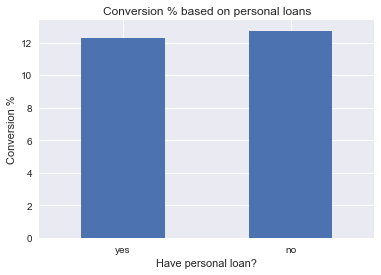

In [33]:
loan_conv = bank.groupby('outcome').loan.value_counts().unstack('outcome')
loan_conv['conversion_rate']= 100*loan_conv[1]/(loan_conv[0]+loan_conv[1])
loan_conv['conversion_rate'].sort_values().plot(kind= 'bar', title = 'Conversion % based on personal loans',rot=360)
plt.ylabel('Conversion %')
plt.xlabel('Have personal loan?')

The above graph represents how customers having prior loans have reacted towards the campaign compared to those who didn't. Conversion rates for both the categories are similar hence not much can be deduced form this variable. This variable is being dropped form further analysis.

In [34]:
#Remove 'loan' variable from the dataset
bank = bank.drop('loan',axis=1)

#### Housing (loan)

In [35]:
bank['housing'].unique()

array(['no', 'yes'], dtype=object)

outcome,0,1,conversion_rate
housing,,,
no,12250,1717,12.293263
yes,14379,2142,12.965317


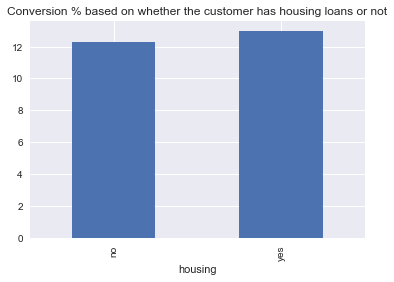

In [36]:
housing_conv = bank.groupby('outcome').housing.value_counts().unstack('outcome')
housing_conv['conversion_rate']= 100*housing_conv[1]/(housing_conv[0]+housing_conv[1])
housing_conv['conversion_rate'].sort_values().plot(kind= 'bar', title = 'Conversion % based on whether the customer has housing loans or not')
housing_conv

Even in the case of customers with/without housing loans,conversion rates are similar hence not much can be deduced form this variable. This variable is being dropped form further analysis.

In [37]:
bank=bank.drop('housing',axis=1)

#### Education

In [38]:
#Combining all basic education into one category 'basic'
bank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'professional.course',
       'basic.9y', 'university.degree', 'illiterate'], dtype=object)

In [39]:
bank['education']=np.where(bank['education']=='basic.4y','basic',bank['education'])
bank['education']=np.where(bank['education']=='basic.6y','basic',bank['education'])
bank['education']=np.where(bank['education']=='basic.9y','basic',bank['education'])

outcome,0,1,conversion_rate
education,,,
basic,7203,842,10.466128
high.school,6765,934,12.131446
illiterate,8,3,27.272727
professional.course,3783,538,12.450822
university.degree,8870,1542,14.809835


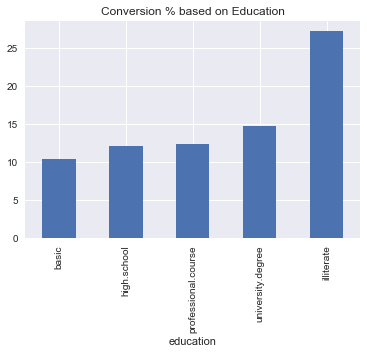

In [40]:
education_conv = bank.groupby('outcome').education.value_counts().unstack('outcome')
education_conv['conversion_rate']= 100*education_conv[1]/(education_conv[0]+education_conv[1])
education_conv['conversion_rate'].sort_values().plot(kind= 'bar', title = 'Conversion % based on Education')
education_conv

Similar conversion rates have been observed across all education categories other than illiterate category. However, sample size of this category is negligible compared to that of customers with some kind of education background. 

#### pdays
    Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [41]:
bank['pdays'].value_counts()

999    29178
3        381
6        363
4        102
2         53
9         53
12        50
7         50
5         43
10        40
13        33
11        25
15        22
1         21
14        17
0         14
8         13
16         8
17         6
18         5
19         3
22         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

A huge majority of customers have not been contacted for any marketing campaigns in the past. This variable will not help in predicting outcome of the campaign and therefore will be dropped for futher analysis. 

In [42]:
bank = bank.drop('pdays', axis =1)

#### poutcome

In [43]:
bank['poutcome'].value_counts()

nonexistent    25836
failure         3461
success         1191
Name: poutcome, dtype: int64

Previous campaign outcome in non existent for 90% of the customers.This variable will not add any value while trying to predict current campaigns outcome and hence will be dropped from further analysis.

In [44]:
bank = bank.drop('poutcome',axis=1)

#### previous

In [45]:
bank['previous'].value_counts()

0    25836
1     3752
2      633
3      190
4       56
5       16
6        4
7        1
Name: previous, dtype: int64

This variable is same as poutcome. It is the number of contacts performed before this campaign and for this client. This variable shall be dropped as well. 

In [46]:
bank = bank.drop('previous', axis =1)

###  Normalizing dataset

In [47]:
bank.describe()

,age,number_calls,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,2.521451,-0.071510,93.523311,-40.602263,3.459938,5160.813409,0.126574
std,10.333529,2.720150,1.610399,0.585374,4.789249,1.777231,75.158065,0.332501
min,17.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,1.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,37.000000,2.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,45.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,95.000000,43.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [48]:
bank_continuous = bank[['number_calls','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [49]:
#Normalizing dataset
for columns in bank_continuous:
    bank[columns] = (bank[columns]-np.mean(bank[columns]))/(np.std(bank[columns]))
    columns = range(bank_continuous.shape[1])

In [50]:
bank.describe()

,age,number_calls,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
count,30488.000000,3.048800e+04,3.048800e+04,3.048800e+04,3.048800e+04,3.048800e+04,3.048800e+04,30488.000000
mean,39.030012,-3.868544e-15,-4.356245e-13,1.733949e-11,-2.024814e-12,-4.008966e-13,3.900070e-11,0.126574
std,10.333529,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,0.332501
min,17.000000,-5.593352e-01,-2.066906e+00,-2.258953e+00,-2.129332e+00,-1.590105e+00,-2.624025e+00,0.000000
25%,31.000000,-5.593352e-01,-1.073347e+00,-7.658666e-01,-4.380167e-01,-1.208044e+00,-8.211284e-01,0.000000
50%,37.000000,-1.917025e-01,7.274775e-01,-1.354903e-01,-2.500927e-01,7.855395e-01,4.016480e-01,0.000000
75%,45.000000,1.759303e-01,9.137697e-01,8.040951e-01,8.774511e-01,8.446212e-01,8.952824e-01,0.000000
max,95.000000,1.488124e+01,9.137697e-01,2.124640e+00,2.861093e+00,8.918865e-01,8.952824e-01,1.000000


##  Check for Multi-collinearity 

In [51]:
bank.corr() > 0.5

,age,number_calls,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
age,True,False,False,False,False,False,False,False
number_calls,False,True,False,False,False,False,False,False
emp.var.rate,False,False,True,True,False,True,True,False
cons.price.idx,False,False,True,True,False,True,False,False
cons.conf.idx,False,False,False,False,True,False,False,False
euribor3m,False,False,True,True,False,True,True,False
nr.employed,False,False,True,False,False,True,True,False
outcome,False,False,False,False,False,False,False,True


High collinearity exists among the following macro-econimic factors:
- Employee Variable rate, Consumer Price Index, Euribor 3m rate and number employed.
Backward Step-wise regression with pseudo R2 score will be used to eliminate collinearity issue.

## PCA to eliminate multi collinearity

In [52]:
#bank subset containing macro-economic factors
bank_pca = bank[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
bank_pca

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.727477,0.804095,0.877451,0.786102,0.401648
2,0.727477,0.804095,0.877451,0.786102,0.401648
3,0.727477,0.804095,0.877451,0.786102,0.401648
4,0.727477,0.804095,0.877451,0.786102,0.401648
6,0.727477,0.804095,0.877451,0.786102,0.401648
8,0.727477,0.804095,0.877451,0.786102,0.401648
9,0.727477,0.804095,0.877451,0.786102,0.401648
11,0.727477,0.804095,0.877451,0.786102,0.401648
12,0.727477,0.804095,0.877451,0.786102,0.401648
13,0.727477,0.804095,0.877451,0.786102,0.401648


In [53]:
# Importing PCA algorithmn from library
from sklearn.decomposition import PCA

In [63]:
# Fitting PCA model onto macro-economic features
pca = PCA()
pca.fit(bank_pca)

# Explained variance from each of the pca components
print(pca.explained_variance_ratio_) 

[ 0.68463879  0.19954623  0.10871448  0.00493359  0.00216691]


In [66]:
#Preparing data for Scree Plot
x_df['Eigen Values'] = pd.DataFrame((pca.explained_variance_ratio_)*10)
x_df['Number of Eigen Values']= range(1, 6, 1)
x_df.rename(columns={0:'Explained variance %'})

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [58]:
# Selecting optimum number of pca components using Scree Plot
x = x_df['Number of Eigen Values']
y = x_df['Eigen Values']
plt.plot(x,y,'bo-',label = "Scree Plot to determine value for number of PCA components")
plt.xlabel('Number of Eigen Values')
plt.ylabel('Eigen Values')

TypeError: list indices must be integers or slices, not str

For greater than 3 eigen values, the slope seems to flatten out i.e not much variance is explained by the remaining two components and hence 3 is an ideal pca number in this case. 

In [67]:
# Generating component array from macro-economic features
pca_array = pca.transform(bank_pca)
# Creating a dataframe with top 3 PCA components
bank_pca_df = pd.DataFrame(pca_array)
bank_pca_df= bank_pca_df.rename(columns={0:'PCA1',1:'PCA2',2:'PCA3',3:'PCA4',4:'PCA5'})
bank_pca_df= bank_pca_df.drop(['PCA4','PCA5'],axis =1)
bank_pca_df

,PCA1,PCA2,PCA3
0,-1.436950,0.689997,0.423691
1,-1.436950,0.689997,0.423691
2,-1.436950,0.689997,0.423691
3,-1.436950,0.689997,0.423691
4,-1.436950,0.689997,0.423691
5,-1.436950,0.689997,0.423691
6,-1.436950,0.689997,0.423691
7,-1.436950,0.689997,0.423691
8,-1.436950,0.689997,0.423691
9,-1.436950,0.689997,0.423691


In [68]:
# Dropping multi-collinear macro economic variabes from the dataset 
bank_final = bank.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis =1)
# Resetting bank dataframe's index to make it suitable for merging purpose
bank_final.index = range(len(bank_final))
bank_final

,age,job,marital,education,contact,month,day_of_week,number_calls,outcome,age_category
0,56,housemaid,married,basic,telephone,may,mon,-0.559335,0,Working adult
1,37,services,married,high.school,telephone,may,mon,-0.559335,0,Working adult
2,40,admin.,married,basic,telephone,may,mon,-0.559335,0,Working adult
3,56,services,married,high.school,telephone,may,mon,-0.559335,0,Working adult
4,59,admin.,married,professional.course,telephone,may,mon,-0.559335,0,Working adult
5,24,technician,single,professional.course,telephone,may,mon,-0.559335,0,Young adult
6,25,services,single,high.school,telephone,may,mon,-0.559335,0,Working adult
7,25,services,single,high.school,telephone,may,mon,-0.559335,0,Working adult
8,29,blue-collar,single,high.school,telephone,may,mon,-0.559335,0,Working adult
9,57,housemaid,divorced,basic,telephone,may,mon,-0.559335,0,Working adult


In [69]:
# Merging macro-economic PCA components with remaining bank dataset
bank_final = bank_final.merge(bank_pca_df,how='inner',left_index = True,right_index = True)
bank_final

,age,job,marital,education,contact,month,day_of_week,number_calls,outcome,age_category,PCA1,PCA2,PCA3
0,56,housemaid,married,basic,telephone,may,mon,-0.559335,0,Working adult,-1.436950,0.689997,0.423691
1,37,services,married,high.school,telephone,may,mon,-0.559335,0,Working adult,-1.436950,0.689997,0.423691
2,40,admin.,married,basic,telephone,may,mon,-0.559335,0,Working adult,-1.436950,0.689997,0.423691
3,56,services,married,high.school,telephone,may,mon,-0.559335,0,Working adult,-1.436950,0.689997,0.423691
4,59,admin.,married,professional.course,telephone,may,mon,-0.559335,0,Working adult,-1.436950,0.689997,0.423691
5,24,technician,single,professional.course,telephone,may,mon,-0.559335,0,Young adult,-1.436950,0.689997,0.423691
6,25,services,single,high.school,telephone,may,mon,-0.559335,0,Working adult,-1.436950,0.689997,0.423691
7,25,services,single,high.school,telephone,may,mon,-0.559335,0,Working adult,-1.436950,0.689997,0.423691
8,29,blue-collar,single,high.school,telephone,may,mon,-0.559335,0,Working adult,-1.436950,0.689997,0.423691
9,57,housemaid,divorced,basic,telephone,may,mon,-0.559335,0,Working adult,-1.436950,0.689997,0.423691


### Creating dummy variables & Final Dataset

In [70]:
# Final set of dependent variables
bank_x = bank_final.drop(['outcome','age'],axis=1)
#Independent variable
bank_y = bank['outcome']
#Creating dummies for all categorical dependent variables
bank_x = pd.get_dummies(bank_x,drop_first= True)
bank_x.head(1)

,number_calls,PCA1,PCA2,PCA3,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,age_category_Working adult,age_category_Young adult
0,-0.559335,-1.43695,0.689997,0.423691,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [71]:
#Resetting bank_y's index
bank_y.index=range(len(bank_y))
# Converting list to DataFrame for future usage
bank_y = pd.DataFrame(bank_y)

Now that we are ready with our final dataset, it is time to apply machine learning algorithmns to achieve final outcomes. Models parameters need to be selected carefully to ensure maximum profitability is achieved. 

Multiple algorithmns will be tested and a model with highest score will be shortlisted. Following classification algorithmns will be tested on the final dataset:
1) Logistic regression
2) Random Forests
3) k-NN

In [72]:
bank_dummy = bank_x.merge(bank_y,how='inner',left_index = True,right_index = True)
bank_dummy.columns

Index(['number_calls', 'PCA1', 'PCA2', 'PCA3', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'age_category_Working adult',
       'age_category_Young adult', 'outcome'],
      dtype='object')

# Model 1 - Scikit Logistic Regression

### Model 1 A - Logistic Regression on Original imbalanced Data

In [73]:
# Importing libraries to perform logistic regression
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score,roc_curve

/Users/Bunny/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [79]:
lr = LogisticRegression()
X_train, X_test, Y_train, Y_test=train_test_split(bank_x, bank_y)
# Introducing intercept term into the dataset
bank_x['intercept'] = 1

# Creating a function for Logistic regression
def test_logistic_regression(X,Y):
    X_train, X_test, Y_train, Y_test=train_test_split(bank_x, bank_y)
    lr.fit(X_train, Y_train)
    Y_predict = lr.predict(X_test)
    Y_proba = [x[1] for x in lr.predict_proba(X_test)]
    print ('Scores at default Threshold of 0.5')
    print ('f1 score:',format(f1_score(Y_test, Y_predict)))
    print ('precision:',format(precision_score(Y_test, Y_predict)))
    print ('recall:',format(recall_score(Y_test, Y_predict)))
    print ('ROC AUC:',format(roc_auc_score(Y_test, Y_proba)))

#### Model performance using standard metrics

In [80]:
test_logistic_regression(X= bank_x, Y= bank_y)

Scores at default Threshold of 0.5
f1 score: 0.32375189107413016
precision: 0.5994397759103641
recall: 0.22176165803108808
ROC AUC: 0.799247276426466


/Users/Bunny/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Model performance on Profitability metric

In [81]:
# Defining Profitability function
def profitability_lr(clf,X_test,Y_test):
    clf.fit(X_test,Y_test)
    Y_proba = [x[1] for x in clf.predict_proba(X_test)]
    threshold = np.arange(0.0,1.1,0.01)
    max_profitability = 0
    for t in threshold:
        Y_predict = 0
        Y_predict = np.where(Y_proba >= t ,1,Y_predict)
        tn,fp,fn,tp = confusion_matrix(Y_test,Y_predict).ravel()
        principal_amt = 1000
        profitability = ((tp*.043*principal_amt))-((tp+fp)*11)
        if profitability > max_profitability: 
            max_profitability = profitability
            max_threshold = t
        plt.plot(t,profitability,'bo',)
        plt.xlabel('Logistic Regression Thresholds')
        plt.ylabel('Profitability')
    print ('Threshold at which profitability is the highest is:',max_threshold)
    print ('Maximum achievable profitability with the model is:',max_profitability)
    

/Users/Bunny/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Threshold at which profitability is the highest is: 0.23
Maximum achievable profitability with the model is: 10750.0


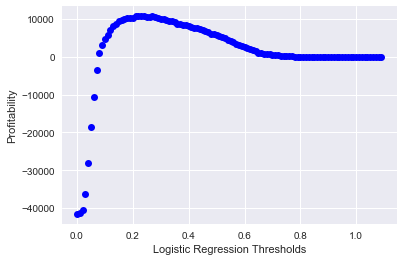

In [82]:
#Model performance on profitability metric
profitability_lr(lr,X_test,Y_test)

#### Regularization on unbalanced LR model

In [85]:
from sklearn.grid_search import GridSearchCV
def regularization(clf,X_test,Y_test):
    param_grid = [0.001, 0.1, 1, 10, 100]
    for param in param_grid:
        clf
        clf = LogisticRegression(C=param)
        clf.fit(X_train,Y_train)
        Y_proba = [x[1] for x in clf.predict_proba(X_test)]
        threshold = np.arange(0.0,1.1,0.01)
        max_profitability = 0
        for t in threshold:
            Y_predict = 0
            Y_predict = np.where(Y_proba >= t ,1,Y_predict)
            tn,fp,fn,tp = confusion_matrix(Y_test,Y_predict).ravel()
            principal_amt = 1000
            profitability = ((tp*.043*principal_amt))-((tp+fp)*11)
            if profitability > max_profitability: 
                max_profitability = profitability
                max_threshold = t
                max_C = param
    print ('Regularization coefficient C at which profitability is maximum is:',param)
    print ('Threshold at which profitability is the highest is:',max_threshold)
    print ('Maximum achievable profitability with the model is:',max_profitability)


#### Model Performance with regularization

In [87]:
regularization(LogisticRegression(),X_test,Y_test)

/Users/Bunny/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regularization coefficient C at which profitability is maximum is: 100
Threshold at which profitability is the highest is: 0.2
Maximum achievable profitability with the model is: 10814.0


### Model 1 B - Logistic Regression on Up-sampled data and testing on hold-out test set

#### Creating a hold-out test set

In [88]:
# Isolating test set from train set 
bank_train, bank_test = train_test_split(bank_dummy)

# Test set
x_bank_test = bank_test.drop('outcome',axis =1)
y_bank_test = bank_test.outcome

# Train set
x_bank_train = bank_train.drop('outcome',axis =1)
y_bank_train = bank_train.outcome

#### Up-sampling the training dataset

In [89]:
from sklearn.utils import resample

# Splitting majority and minority class sets
bank_maj = bank_train[bank_train.outcome==0] # Majority class
bank_min= bank_train[bank_train.outcome==1] # Minority class

#upsampling minority class 
bank_min_upsmpl = resample(bank_min, 
                                 replace=True, # sample with replacement
                                 n_samples=len(bank_maj),  # to match majority class size
                                 random_state=123) # reproducible results
bank_upsmpl = pd.concat([bank_maj, bank_min_upsmpl])
y_upsmpl = bank_upsmpl.outcome
x_upsmpl = bank_upsmpl.drop('outcome', axis=1)

#### Defining Regularization function for resampled data

In [90]:
def regularization_resample(clf,X_train,Y_train,X_test,Y_test):
    param_grid = [0.001, 0.1, 1, 10, 100]
    for param in param_grid:
        clf
        #clf = LogisticRegression(C=param)
        clf.fit(X_train,Y_train)
        Y_proba = [x[1] for x in clf.predict_proba(X_test)]
        threshold = np.arange(0.0,1.1,0.01)
        max_profitability = 0
        for t in threshold:
            Y_predict = 0
            Y_predict = np.where(Y_proba >= t ,1,Y_predict)
            tn,fp,fn,tp = confusion_matrix(Y_test,Y_predict).ravel()
            principal_amt = 1000
            profitability = ((tp*.043*principal_amt))-((tp+fp)*11)
            if profitability > max_profitability: 
                max_profitability = profitability
                max_threshold = t
                max_C = param
    print ('Regularization Coefficient C at which profitability is maximum is:',param)
    print ('Threshold at which profitability is the highest is:',max_threshold)
    print ('Maximum achievable profitability with the model is:',max_profitability)

#### Model Performance

In [92]:
# Profitabilty with upsampling
regularization_resample(LogisticRegression(),x_upsmpl,y_upsmpl,x_bank_train,y_bank_train)

Regularization Coefficient C at which profitability is maximum is: 100
Threshold at which profitability is the highest is: 0.65
Maximum achievable profitability with the model is: 29847.0


### Model 1 C - Logistic Regression on Down-sampled data and testing on hold-out test set

#### Up-sampling the training dataset

In [93]:
# Splitting majority and minority class sets
bank_maj = bank_train[bank_train.outcome==0] # Majority class
bank_min= bank_train[bank_train.outcome==1] # Minority class

#downsampling majority class
bank_maj_downsmpl = resample(bank_maj, 
                                 replace=False,     # sample without replacement
                                 n_samples=len(bank_min),    # to match minority class size
                                 random_state=123) # reproducible results
bank_downsmpl = pd.concat([bank_min, bank_maj_downsmpl])
y_downsmpl = bank_downsmpl.outcome
x_downsmpl = bank_downsmpl.drop('outcome', axis=1)

#### Model Performance

In [95]:
# Profitabilty with downsampling
regularization_resample(LogisticRegression(),x_downsmpl,y_downsmpl,x_bank_train,y_bank_train)

Regularization Coefficient C at which profitability is maximum is: 100
Threshold at which profitability is the highest is: 0.66
Maximum achievable profitability with the model is: 29753.0


Dataset rebalancing has proven to be very good in our case. Profitability has tripled with both upsampling and downsampling data. Out of the two, upsampling stood out with slightly higher profitability results at a cutoff threshold of 0.65 and regularization coefficient of 100. 

### ROC curve

In [ ]:
fpr, tpr, thresholds =roc_curve(Y_test, Y_proba)

In [ ]:
from sklearn.metrics import roc_curve, auc
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

In [ ]:
import pylab as pl
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr

pl.plot(fpr,tpr)
pl.xlabel('False positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')

### Cost-benefit analysis